<a href="https://colab.research.google.com/github/SaraCordovaMero/nuevoProyecto/blob/main/An%C3%A1lisis_de_Sentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
import pandas as pd
from textblob import TextBlob
from googletrans import Translator

In [ ]:
#TRADUCCIÓN DEL TEXTO DEL INGLÉS AL ESPAÑOL
def TranslateComent (strComent:str):
  translator = Translator()
  strEngComment = translator.translate(strComent, scr="es", dest="en")
  return strEngComment.text

In [ ]:
#POLARIDAD PARA ESTABLECER AFINIDAD O CONTRADICCIÓN
def getPolarity(strComent:str):
  strComment = TranslateComent(strComment)
  analysis = TextBlob(strComment)
  return analysis.sentiment.polarity

In [ ]:
#CARGAR DATASET
from google.colab import drive
drive.mount('/content/drive')
ruta = '/content/drive/MyDrive/Colab Notebooks/Comentarios.csv'
data = pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.to_csv('resultados.csv', index=False)

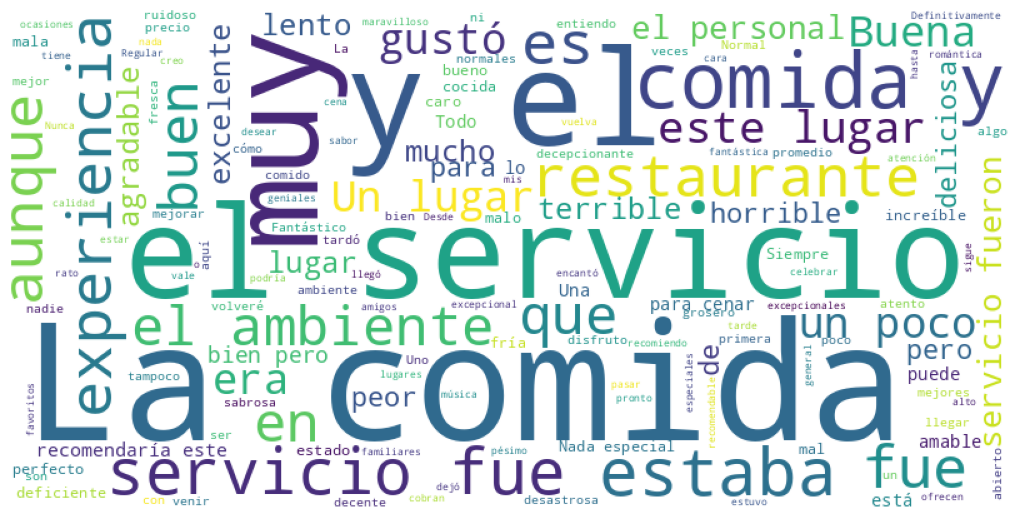

In [ ]:
# CREAR NUBE DE PALABRAS CON EL DATASET COMENTARIOS
!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# COMBINAR LOS COMENTARIOS
text = " ".join(review for review in df.Comentario)

# CREAR NUBE DE PALABRAS
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# MOSTRAR NUBE DE PALABRAS
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
print(data.columns)

Index(['Comentario'], dtype='object')


In [ ]:
# CONTAR LOS COMENTARIOS POSITIVOS Y NEGATIVOS
positivos = df[df['Comentario'] > 0].shape[0]
negativos = df[df['Comentario'] < 0].shape[0]
neutros = df[df['Comentario'] == 0].shape[0]

print(f"Comentarios positivos: {positivos}")
print(f"Comentarios negativos: {negativos}")
print(f"Comentarios neutros: {neutros}")

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
# CLASIFICAR SENTIMIENTO
def classifySentiment(polarity: float):
    if polarity > 0:
        return 'Positivo'
    elif polarity < 0:
        return 'Negativo'
    else:
        return 'Neutral'

In [ ]:
# APLICAR FUNCIÓN POLARIDAD Y CLASIFICAR SENTIMIENTO
df['Polaridad'] = df['Comentario'].apply(getPolarity)
df['Sentimiento'] = df['Polaridad']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#CONTAR COMENTARIOS EN CADA CATERGORÍA DE SENTIMIENTO
sns.set(style="whitegrid")
sentiment_counts = df['Sentimiento'].value_counts()

In [ ]:
#GRAFICAR
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Distribución de Sentimientos en Comentarios', fontsize=16)
plt.xlabel('Sentimiento', fontsize=14)
plt.ylabel('Cantidad de Comentarios', fontsize=14)
# valores en las barras
for index, value in enumerate(sentiment_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# GRAFICAR
plt.tight_layout()
plt.show()